# Problem Statement:
# https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)
import math
from sklearn import metrics

# Loading Datasets

In [2]:
train_data=pd.read_csv('bigmarttrain.csv')
test_data=pd.read_csv('bigmarttest.csv')

# Understanding and Preprocessing on data

In [3]:
train_data['source']='train'
test_data['source']='test'

In [4]:
data = pd.concat([train_data, test_data],ignore_index=True)
print(train_data.shape, test_data.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [15]:
data.shape

(14204, 13)

In [6]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [5]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['LF'],'Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['low fat'],'Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['reg'],'Regular')


In [7]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [6]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [7]:
data['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 14204, dtype: object

In [7]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [9]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [8]:
data=data.drop('Item_Type',axis=1)

In [13]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.3,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,train,Food


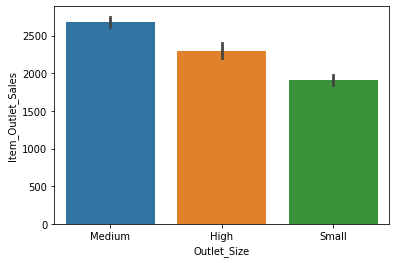

In [15]:
sns.barplot(x=data['Outlet_Size'],y=data['Item_Outlet_Sales'])

In [9]:
def num_years(col):
    return 2013-col

In [10]:
data['Years_of_Operation']=data['Outlet_Establishment_Year'].apply(num_years)

In [12]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Years_of_Operation
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# Missing values treatment

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Item_Type_Combined              0
Years_of_Operation              0
dtype: int64

In [12]:
data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)

In [13]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())


In [14]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [15]:
data['Item_Visibility'] = data['Item_Visibility'].replace([0],data['Item_Visibility'].mean())

# Outlier Treatment

In [20]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,FDA15,9.3,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,train,Food


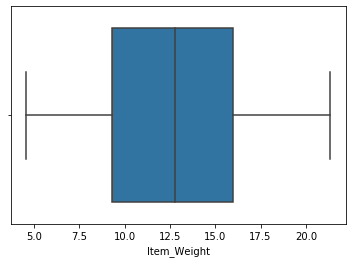

In [21]:
sns.boxplot(data['Item_Weight'])

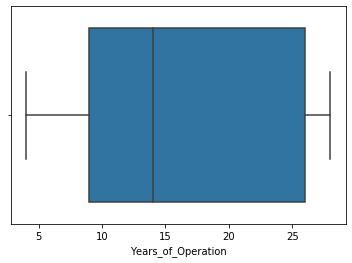

In [18]:
sns.boxplot(data['Years_of_Operation'])

In [19]:
data['Years_of_Operation'].skew()

0.3964651900863859

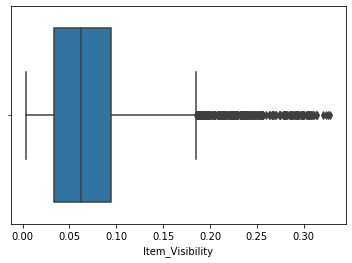

In [22]:
sns.boxplot(data['Item_Visibility'])

In [23]:
data['Item_Visibility'].skew()

1.320682723150534

In [16]:
data['Item_Visibility']=np.log(data['Item_Visibility'])

In [17]:
percentile25 = data['Item_Visibility'].quantile(0.25)
percentile75 = data['Item_Visibility'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data[data['Item_Visibility'] <lower_limit]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Years_of_Operation
111,FDS52,8.890000,Low Fat,-5.202011,102.4016,OUT017,2007,Medium,Tier 2,Supermarket Type1,2732.4432,train,Food,6
230,NCX42,12.792854,Low Fat,-5.124424,165.6526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4769.1254,train,Non-Consumable,28
273,FDK51,19.850000,Low Fat,-5.252550,264.0884,OUT035,2004,Small,Tier 2,Supermarket Type1,5829.7448,train,Food,9
471,FDA36,5.985000,Low Fat,-5.171178,184.8924,OUT045,2002,Medium,Tier 2,Supermarket Type1,1665.8316,train,Food,11
516,NCX42,6.360000,Low Fat,-5.117544,163.6526,OUT045,2002,Medium,Tier 2,Supermarket Type1,5262.4832,train,Non-Consumable,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,FDG12,6.635000,Regular,-5.063903,118.9098,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test,Food,26
13011,FDB23,19.200000,Regular,-5.185473,224.8062,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test,Food,14
13870,FDA36,5.985000,Low Fat,-5.173393,183.4924,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN,test,Food,9
13966,FDE20,11.350000,Regular,-5.193409,168.1790,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,Food,4


In [18]:
data['Item_Visibility']=np.where(data['Item_Visibility']<lower_limit,data['Item_Visibility'].mode(),data['Item_Visibility'])

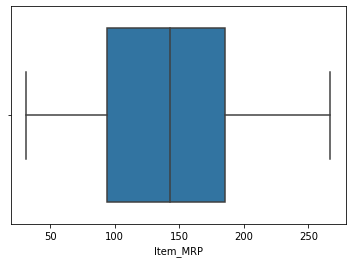

In [15]:
sns.boxplot(train_data['Item_MRP'])

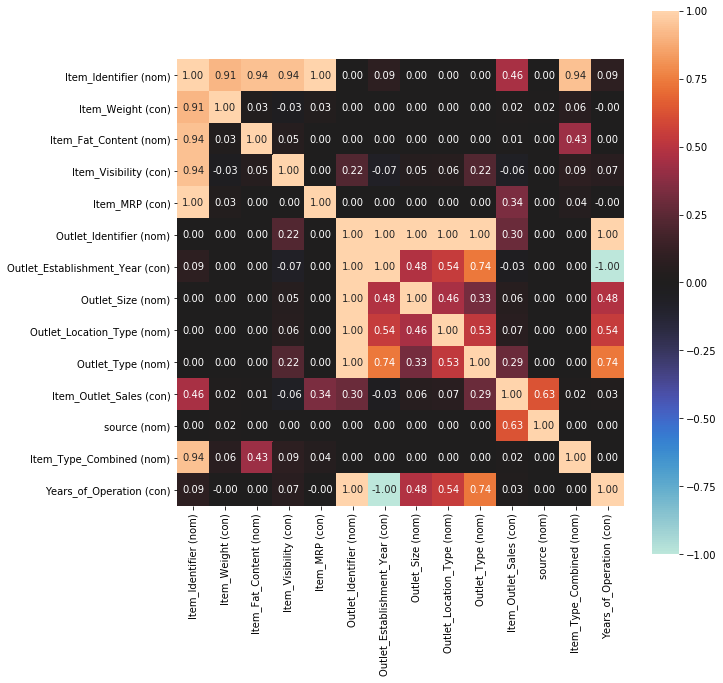

In [23]:
from dython.nominal import associations
associations(data,figsize=(10,10),mark_columns=True);

# Changing Categorical variables

In [19]:
data=data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [20]:
data = pd.get_dummies(data, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Item_Type_Combined','Outlet_Size'],drop_first=True)

# Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
data[['Item_Weight','Item_Visibility','Item_MRP','Years_of_Operation']]=StandardScaler().fit_transform(data[['Item_Weight','Item_Visibility','Item_MRP','Years_of_Operation']])

In [22]:
data=data.drop('Outlet_Establishment_Year',axis=1)

In [25]:
data.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Years_of_Operation,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Size_Medium,Outlet_Size_Small
0,-0.824939,-1.67853,1.752511,3735.138,train,-0.139681,0,0,0,1,0,0,1,0,1,0


In [23]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Train test

In [24]:
train_data=pd.read_csv('train_modified.csv')
train_data.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_of_Operation,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Size_Medium,Outlet_Size_Small
0,-0.824939,-1.67853,1.752511,3735.138,-0.139681,0,0,0,1,0,0,1,0,1,0


In [25]:
test_data=pd.read_csv('test_modified.csv')
test_data.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Years_of_Operation,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Size_Medium,Outlet_Size_Small
0,1.879311,-2.699483,-0.533831,-0.139681,0,0,0,1,0,0,1,0,1,0


In [33]:
train_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Years_of_Operation', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Non-Consumable',
       'Outlet_Size_Medium', 'Outlet_Size_Small'],
      dtype='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Years_of_Operation', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Non-Consumable',
       'Outlet_Size_Medium', 'Outlet_Size_Small'
       ]]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
2,Item_MRP,1.000977
0,Item_Weight,1.004065
1,Item_Visibility,1.059438
10,Item_Type_Combined_Non-Consumable,1.416773
4,Item_Fat_Content_Regular,1.766901
12,Outlet_Size_Small,2.241996
9,Outlet_Type_Supermarket Type3,3.142156
5,Outlet_Location_Type_Tier 2,3.826575
7,Outlet_Type_Supermarket Type1,4.396984
6,Outlet_Location_Type_Tier 3,4.577260


In [26]:
train_data=train_data.drop('Item_Type_Combined_Food',axis=1)
test_data=test_data.drop('Item_Type_Combined_Food',axis=1)

In [27]:
X=train_data.drop('Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Multiple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
multiplelog_pred = regressor.predict(X_test)

In [31]:
mse = sklearn.metrics.mean_squared_error(y_test, multiplelog_pred)
rmse = math.sqrt(mse)
rmse

<IPython.core.display.Javascript object>

1129.4690530554437

In [32]:
r2_score(y_test,multiplelog_pred)

0.5641402115942293

# Adaboost Regressor

In [37]:
from sklearn.ensemble import AdaBoostRegressor

adaboost= AdaBoostRegressor(n_estimators = 100)
adaboost.fit(X_train, y_train)

# predicting the test set results
y_pred_ada = adaboost.predict(X_test)



In [38]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred_ada)
rmse = math.sqrt(mse)
rmse

<IPython.core.display.Javascript object>

1255.363251130874

# XGboost regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

xgboost = GradientBoostingRegressor()
xgboost.fit(X_train, y_train)

# predicting the test set results
y_pred_xg = xgboost.predict(X_test)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred_xg)**2).sum()/len(y_test)))

RMSE : 1100.4165976002869


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)

In [ ]:
dt_pred=dt.predict(X_test)

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, dt_pred)
rmse = math.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,dt_pred)

# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr= SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

In [ ]:
svr_pred=svr.predict(X_test)

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, svr_pred)
rmse = math.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,svr_pred)

# Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
randomforest=rf.predict(X_test)

In [43]:
mse = sklearn.metrics.mean_squared_error(y_test, randomforest)
rmse = math.sqrt(mse)
rmse

<IPython.core.display.Javascript object>

1150.7683527393579

# sample submission

In [37]:
sample=pd.read_csv('sample_submission.csv')

In [38]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [40]:
sample_test=xgboost.predict(test_data)

In [41]:
sample['Item_Outlet_Sales']=sample_test

In [42]:
sample.to_csv('subb.csv',index=False)